In [161]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow.compat.v1 as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

DATADIR = "C:/Users/David/OneDrive/Documents/Code/REU-DataScienceProgram/su21-reu-364/project/images/asl"
CATEGORIES = ["a", "b", "c"]

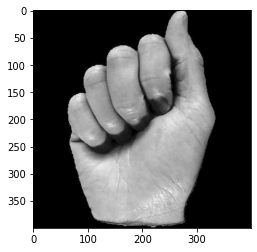

In [162]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [163]:
# Print the shape of the image
print(img_array.shape)

(400, 400)


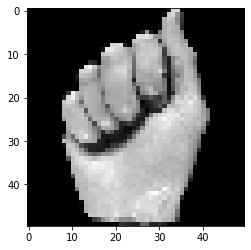

In [164]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [165]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    return training_data

training_data = create_training_data()

210
(50, 50)


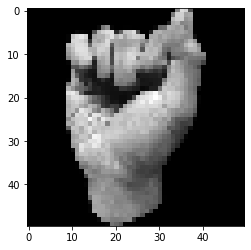

0


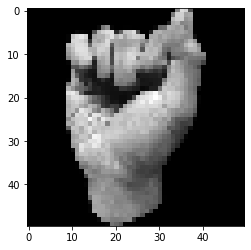

(210, 1)


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [166]:
print(len(training_data))
print(training_data[0][0].shape)

plt.imshow(training_data[69][0], cmap = 'gray')
plt.show()

#Creating label dataset: 0, 1, and 2 means a, b, and c, respectively
label_data = []
letter = 0
for img in range(0,len(training_data),70):
    label_data.append(np.matlib.repmat(letter, 1, 70))
    letter = letter + 1
#print(label_data[1][0].shape)
print(label_data[0][0][50])
plt.imshow(training_data[69][0], cmap = 'gray')
plt.show()
labels = numpy.array(label_data).reshape((210,1))
#labels_reshape = labels.reshape((210,1))
print(labels.shape)
labels

In [167]:
import random

random.shuffle(training_data)

In [168]:
for sample in training_data:
    print(sample[1])

2
0
1
1
1
0
2
0
2
0
1
2
2
2
0
0
2
0
1
1
2
0
0
1
2
1
0
2
0
1
0
0
1
0
2
0
2
2
0
1
1
2
2
2
2
2
2
2
0
1
2
1
1
0
0
0
0
1
0
0
0
1
2
1
0
0
2
2
1
0
0
0
1
2
1
0
2
2
0
1
2
1
2
1
1
0
2
0
2
0
2
1
1
2
2
1
0
2
2
1
1
1
0
1
0
1
0
1
0
0
1
0
0
2
2
2
2
1
2
1
0
0
1
2
0
1
2
2
2
1
1
1
2
1
2
1
2
2
1
0
0
1
2
2
0
2
0
0
1
1
0
1
2
2
0
1
2
0
0
1
1
0
1
2
2
0
2
2
1
1
1
0
2
2
1
1
1
0
1
0
1
0
0
2
1
0
1
1
1
2
1
0
2
0
1
2
2
0
2
0
0
1
1
0
2
2
1
0
2
0


In [169]:
X = []
y = []

In [170]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#print(X.shape)

In [173]:
# Importing the required layers operation and activation function to build your model
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [174]:
# Defining basic parameters
batch_size = 32
epochs = 15
num_classes = 10

In [175]:
# Buidling your CNN model

X = X/255

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes, activation='softmax'))

In [176]:
# Compiling your model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [177]:
# Verify the outpur shape for each layer and the number of trainable parameters.
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 128)        

In [178]:
len(X)

210

In [180]:
# Train your model
model.fit(X, y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_validation, y_validation))

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})